# Check Continuum Fit

In [5]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../')
from utils import *

In [12]:
ids = 0
dset_dir = os.path.join(solar_dir,'DataSets','Training',f'DS{ids}')

In [13]:
inst = 'expres'
file_list = glob(os.path.join(dset_dir,f'DS{ids}_*_{inst}.fits'))
hdus = fits.open(file_list[0])
hdus.info()

Filename: /mnt/home/lzhao/ceph/SolarData/DataSets/Training/DS0/DS0_001_expres.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  WAVELENGTH    1 ImageHDU         8   (7920, 87)   float64   
  2  FLUX          1 ImageHDU         8   (7920, 87)   float64   
  3  VARIANCE      1 ImageHDU         8   (7920, 87)   float64   
  4  CONTINUUM     1 ImageHDU         8   (7920, 87)   float64   
  5  BLAZE         1 ImageHDU         8   (7920, 87)   float64   
  6  COMMON_MASK    1 ImageHDU         8   (7920, 87)   int64   
  7  TELLURIC_MASK    1 ImageHDU         8   (7920, 87)   int64   


In [17]:
wave = hdus['wavelength'].data.copy()
flux = hdus['flux'].data.copy()
blaz = hdus['blaze'].data.copy()
cont = hdus['continuum'].data.copy()
hdus.close()

In [18]:
num_ord, num_pix = wave.shape

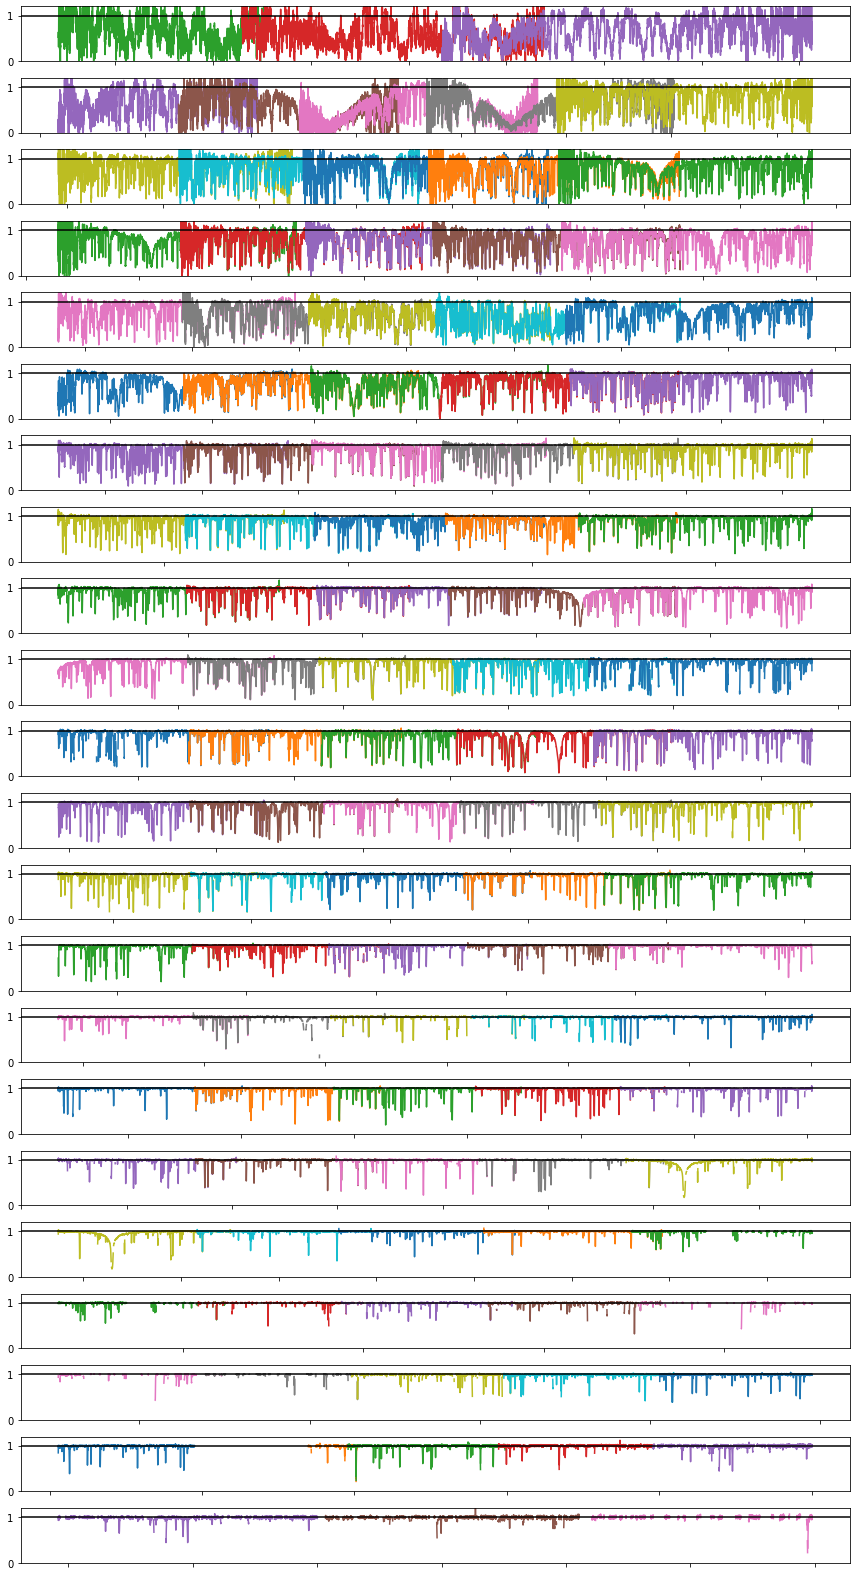

In [24]:
colors =sns.color_palette()
num_row = num_ord//4
if num_ord%4!=0:
    num_row += 1
fig, axes = plt.subplots(num_row,1,figsize=(12,num_row))
for iord,nord0 in enumerate(np.arange(0,num_ord,4)):
    ax = axes[iord]
    for nord in range(nord0,nord0+5):
        if nord>=num_ord:
            break
        ax.plot(wave[nord],flux[nord]/cont[nord],color=colors[nord%10])
    ax.axhline(1,color='k')
    ax.set_ylim(0,1.2)
    ax.set_xticklabels([])
fig.tight_layout()